# Dataset Generation
In this notebook, we generate the 75 time series segmentation datasets from the UCR datasets.

In [19]:
import numpy as np

import pandas as pd

pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 26})

import aeon, os

DATA_PATH = os.path.join(os.path.dirname(aeon.__file__), "datasets/data")

import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import sys

sys.path.append("../../")

from tqdm import tqdm

In order to run this notebook, you must first download the UCR datasets from https://www.cs.ucr.edu/~eamonn/time_series_data_2018 and place them into the DATA_PATH folder.

In [20]:
DATA_PATH

'/Users/ermshaua/miniconda3/envs/py3k/lib/python3.8/site-packages/aeon/datasets/data'

In [21]:
from tssb.utils import generate_time_series_segmentation_dataset, load_time_series_segmentation_datasets, visualize_time_series
from aeon.datasets import load_from_tsv_file

Let's create an example TS for the ArrowHead dataset and visualize it.

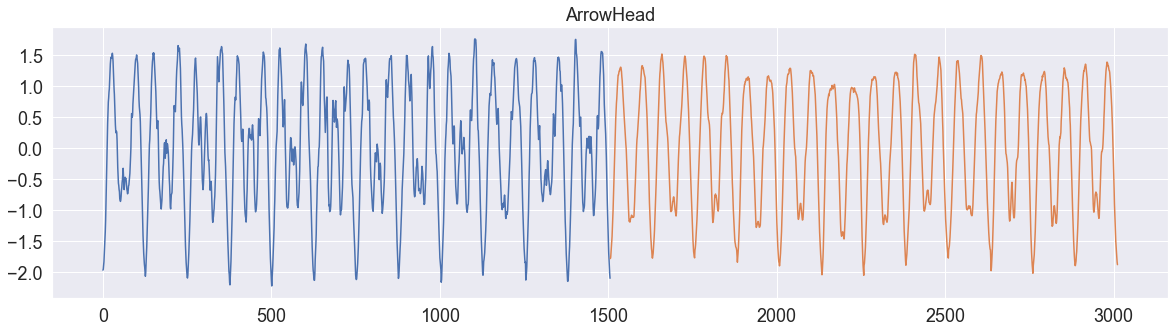

In [22]:
X, y = load_from_tsv_file(os.path.join(DATA_PATH, "ArrowHead/ArrowHead_TRAIN.tsv"))
ts, cps = generate_time_series_segmentation_dataset(X, y, labels=[0, 1], resample_rate=2)
fig, ax = visualize_time_series(ts, "ArrowHead", cps_true=cps)

Let's now load the properties for the entire TSSB dataset (labels, resample_rates, label_cuts) and re-create it.

In [23]:
prop_filename = os.path.join("../datasets", "properties.txt")
prop_file = []

with open(prop_filename, 'r') as file:
    for line in file.readlines():
        line = line.split(",")

        ds_name, interpretable, label_cut, resample_rate, labels = line[0], bool(line[1]), int(line[2]), int(
            line[3]), line[4:]
        labels = [int(l.replace("\n", "")) for l in labels]

        prop_file.append((ds_name, label_cut, resample_rate, labels))

prop_file = pd.DataFrame.from_records(prop_file, columns=["Dataset", "Label Cut", "Resample Rate", "Labels"])
prop_file

,Dataset,Label Cut,Resample Rate,Labels
0,Adiac,0,4,"[0, 1, 2, 4]"
1,ArrowHead,0,4,"[0, 1]"
2,Beef,0,4,"[0, 1]"
3,BeetleFly,0,4,"[0, 1]"
4,BirdChicken,0,4,"[0, 1]"
5,Car,0,16,"[0, 1, 2, 3]"
6,CBF,0,4,"[1, 0, 2]"
7,Chinatown,0,1,[0]
8,ChlorineConcentration,0,8,"[0, 2]"
9,CinCECGTorso,0,8,"[1, 2, 3]"


In [24]:
tssb = []

for _, (dataset, label_cut, resample_rate, labels) in tqdm(prop_file.iterrows()):
    X, y = load_from_tsv_file(os.path.join(DATA_PATH, f"{dataset}/{dataset}_TRAIN.tsv"))
    ts, cps = generate_time_series_segmentation_dataset(X, y, labels=labels, resample_rate=resample_rate,
                                                        label_cut=label_cut)
    tssb.append((dataset, cps, ts))

tssb = pd.DataFrame.from_records(tssb, columns=["dataset", "change_points", "time_series"])
tssb

75it [00:39,  1.89it/s]


,dataset,change_points,time_series
0,Adiac,"[572, 1012, 1232]","[1.6811456620860457, 1.3833939713969476, 1.029..."
1,ArrowHead,[753],"[-1.9577206309715156, -1.8580819245996238, -1...."
2,Beef,[705],"[-0.3808184611459132, -0.3522382904977104, -0...."
3,BeetleFly,[1280],"[1.1148051937755514, 0.7744033379924569, 0.477..."
4,BirdChicken,[1280],"[1.697714230537119, 1.439032088641677, 1.22286..."
5,Car,"[577, 1154, 1550]","[1.4516478867009357, 1.0301743848837297, 0.531..."
6,CBF,"[384, 704]","[-1.2771304421352372, -0.6898106156588633, -0...."
7,Chinatown,[],"[0.02593528814386279, -0.43565455927050417, -0..."
8,ChlorineConcentration,[2365],"[2.4962273725836015, 1.0467432663502947, 0.391..."
9,CinCECGTorso,"[2663, 5121]","[-0.11821460735609512, -0.11532619232132583, -..."


Now, let's load the reference benchmark to compare it to the generated one (they should match).

In [25]:
tssb_ref = load_time_series_segmentation_datasets()
tssb_ref

,dataset,window_size,change_points,time_series
0,Adiac,10,"[572, 1012, 1232]","[1.681146, 1.383394, 1.029389, 0.688386, 0.354..."
1,ArrowHead,10,[753],"[-1.957721, -1.858082, -1.657983, -1.420794, -..."
2,Beef,50,[705],"[-0.380818, -0.352238, -0.295392, -0.225041, -..."
3,BeetleFly,10,[1280],"[1.114805, 0.774403, 0.477129, 0.115781, -0.24..."
4,BirdChicken,20,[1280],"[1.697714, 1.439032, 1.22287, 0.99708, 0.76479..."
5,Car,20,"[577, 1154, 1550]","[1.451648, 1.030174, 0.531853, 0.040229, -0.40..."
6,CBF,20,"[384, 704]","[-1.27713, -0.689811, -0.901181, -0.937038, -0..."
7,Chinatown,10,[],"[0.025935, -0.435655, -0.608168, -0.81565, -1...."
8,ChlorineConcentration,10,[2365],"[2.496227, 1.046743, 0.391124, 0.607525, -0.22..."
9,CinCECGTorso,10,"[2663, 5121]","[-0.118215, -0.115326, -0.111855, -0.1229, -0...."


Lastly, let's assert that the generated and reference benchmark datasets match.

In [26]:
for idx in tqdm(range(tssb.shape[0])):
    assert np.array_equal(tssb.change_points.iloc[idx], tssb_ref.change_points.iloc[idx])
    assert np.allclose(tssb.time_series.iloc[idx], tssb_ref.time_series.iloc[idx], rtol=1e-03, atol=1e-05)

print("Dataset successfully re-created!")

100%|██████████| 75/75 [00:00<00:00, 2879.96it/s]

Dataset successfully re-created!
